In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = {
    "Name":["Ahmed","Sayed","Elewaa","Osama"],
    "Grade":[90,89,97,100],
    "Dagree":["+A","A","+A","+A"]
}

dataSet=pd.DataFrame(data)

print(dataSet.loc[2:])

     Name  Grade Dagree
2  Elewaa     97     +A
3   Osama    100     +A


In [20]:
df=pd.read_csv("sales.csv")

print(50*'=')
df.info()
print(50*'=')
# df.describe()
print(50*'=')
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2
5,6,A,Chicago,Normal,Male,Shampoo,Stationery,11.24,9,7.08,108.24,0
6,7,A,Chicago,Normal,Male,Shampoo,Personal Care,10.71,1,0.75,11.46,0
7,8,B,Los Angeles,Normal,Female,Shampoo,Household,18.23,9,11.48,175.55,0
8,9,A,Chicago,Member,Female,Apple,Fruits,14.15,20,19.81,302.81,30
9,10,B,Los Angeles,Member,Male,Shampoo,Fruits,18.42,19,24.50,374.48,37


In [16]:
print(50*'=')
df.tail(15)

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
985,986,A,New York,Member,Male,Orange Juice,Personal Care,6.85,19,9.11,139.26,13
986,987,A,New York,Normal,Male,Apple,Fruits,2.31,19,3.07,46.96,0
987,988,A,New York,Member,Female,Apple,Stationery,11.35,9,7.15,109.30,10
988,989,B,Los Angeles,Member,Female,Shampoo,Beverages,10.49,9,6.61,101.02,10
989,990,A,Chicago,Member,Female,Notebook,Stationery,5.67,10,3.97,60.67,6
990,991,A,Chicago,Normal,Female,Detergent,Stationery,8.18,1,0.57,8.75,0
991,992,A,New York,Normal,Male,Notebook,Household,11.33,9,7.14,109.11,0
992,993,A,New York,Normal,Female,Apple,Stationery,4.59,19,6.10,93.31,0
993,994,A,New York,Normal,Female,Orange Juice,Personal Care,5.16,13,4.70,71.78,0
994,995,A,New York,Member,Male,Notebook,Personal Care,6.60,5,2.31,35.31,3


In [30]:
print(df.groupby("city")["total_price"].sum())
print(50*'=')
print(df.groupby("city")["total_price"].mean())

city
Chicago        42584.71
Los Angeles    35772.26
New York       40226.93
Name: total_price, dtype: float64
city
Chicago        129.044576
Los Angeles    109.730859
New York       116.938750
Name: total_price, dtype: float64


In [31]:
print(df.groupby("city")["total_price"].agg(["sum","mean","max"]))

                  sum        mean     max
city                                     
Chicago      42584.71  129.044576  427.14
Los Angeles  35772.26  109.730859  421.64
New York     40226.93  116.938750  433.99


In [32]:
print(df.groupby("city").agg({
    "total_price":["sum","mean"],
    "tax":"mean"
}))

            total_price                   tax
                    sum        mean      mean
city                                         
Chicago        42584.71  129.044576  8.442485
Los Angeles    35772.26  109.730859  7.178650
New York       40226.93  116.938750  7.650436


In [50]:
print(df.groupby(["city","product_name"])["total_price"].sum().reset_index()
)

           city  product_name  total_price
0       Chicago         Apple      7111.84
1       Chicago     Detergent      7302.21
2       Chicago      Notebook      7934.45
3       Chicago  Orange Juice     10123.48
4       Chicago       Shampoo     10112.73
5   Los Angeles         Apple      5525.06
6   Los Angeles     Detergent      7026.62
7   Los Angeles      Notebook      7607.34
8   Los Angeles  Orange Juice      8564.29
9   Los Angeles       Shampoo      7048.95
10     New York         Apple      6977.13
11     New York     Detergent      8120.24
12     New York      Notebook      9251.19
13     New York  Orange Juice      5998.69
14     New York       Shampoo      9879.68


In [37]:
print(df.groupby(["city","product_name"]).agg(
    Total_Price=("total_price","sum")
    ).sort_values("Total_Price",ascending=False)
     .reset_index()
    )

           city  product_name  Total_Price
0       Chicago  Orange Juice     10123.48
1       Chicago       Shampoo     10112.73
2      New York       Shampoo      9879.68
3      New York      Notebook      9251.19
4   Los Angeles  Orange Juice      8564.29
5      New York     Detergent      8120.24
6       Chicago      Notebook      7934.45
7   Los Angeles      Notebook      7607.34
8       Chicago     Detergent      7302.21
9       Chicago         Apple      7111.84
10  Los Angeles       Shampoo      7048.95
11  Los Angeles     Detergent      7026.62
12     New York         Apple      6977.13
13     New York  Orange Juice      5998.69
14  Los Angeles         Apple      5525.06


In [55]:
result=df.groupby("city")["total_price"].sum().reset_index()

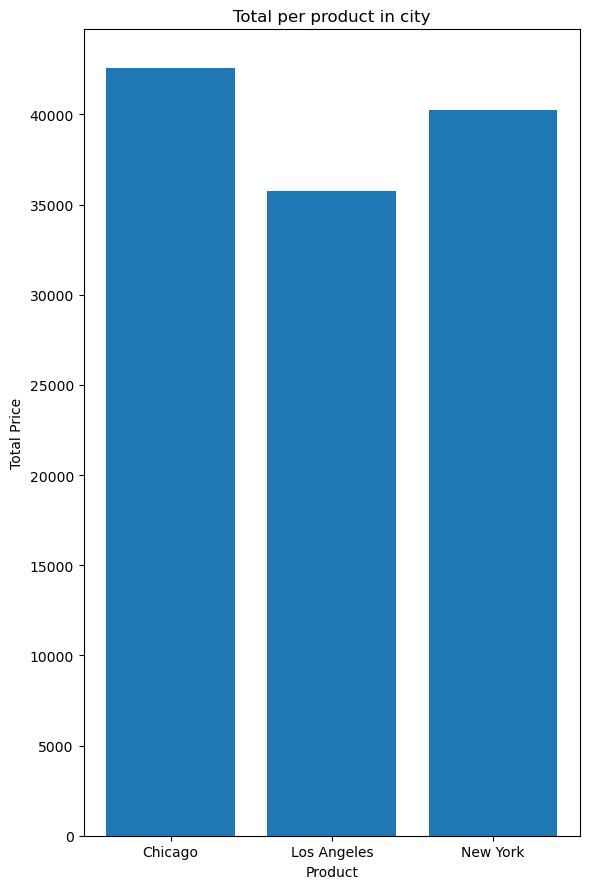

In [56]:
plt.figure(figsize=(6,9))
plt.bar(result["city"],result["total_price"])
plt.xlabel("Product")
plt.ylabel("Total Price")
plt.title("Total per product in city")
plt.tight_layout()
plt.show()

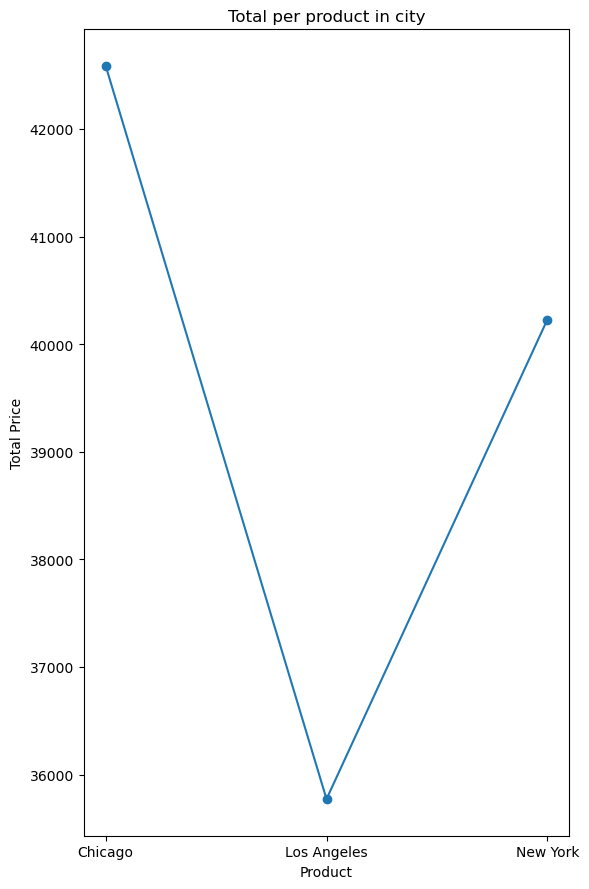

In [57]:
plt.figure(figsize=(6,9))
plt.plot(result["city"],result["total_price"],marker="o")
plt.xlabel("Product")
plt.ylabel("Total Price")
plt.title("Total per product in city")
plt.tight_layout()
plt.show()

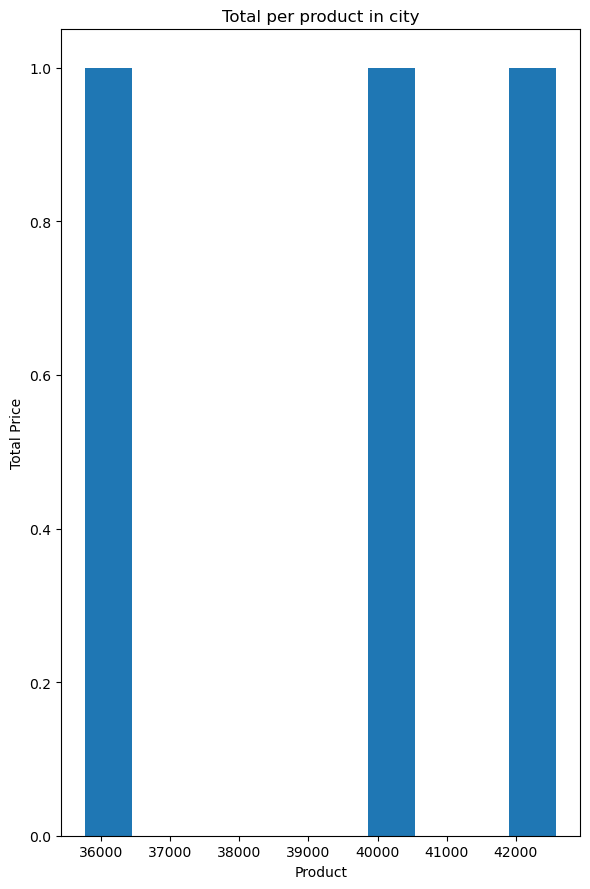

In [58]:
plt.figure(figsize=(6,9))
plt.hist(result["total_price"])
plt.xlabel("Product")
plt.ylabel("Total Price")
plt.title("Total per product in city")
plt.tight_layout()
plt.show()